## Read results from file and compute the result with N_obs term only (for comparison purposes). This way we can see the effect of including velocities in the calculation (the fruits of our effort!)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from utils_Nobs import *
plt.rcParams.update(plt.rcParamsDefault)
get_ipython().run_line_magic('matplotlib', 'inline')

# Function to read the results from a file
def read_results_from_file(filename):
    # Load the data from the text file
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    
    # Split the data into two separate arrays
    trmass_values = data[:, 0]
    results_values = data[:, 1]
    
    return trmass_values, results_values

# Read the results from the 'results.txt' file
filename = 'trmass_likelihood_exp.txt'
trmass_values, tot_likelihood_exp = read_results_from_file(filename)
Nobs_likelihood = []
for tr in trmass_values:
    Nobs_likelihood_val = neg2lnL(trmass=tr)
    Nobs_likelihood.append(Nobs_likelihood_val)

## I did an example calculation with y_C = 0 by modifying the likelihood_processing.py script, and an example calculation with only including the P(N_obs) term by modifying the utils.py file and creating a new utils_Nobs.py file. Uncomment the first line of the following code block to run without the y_C = 0 data. 

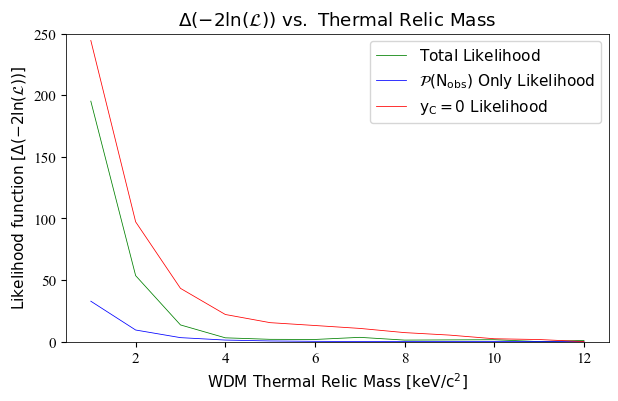

In [10]:
trash, tot_likelihood_yc0 = read_results_from_file('trmass_likelihood_exp2.txt')
trash, tot_likelihood = read_results_from_file('trmass_likelihood.txt')
plt.rcParams.update(plt.rcParamsDefault)
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.56
mpl.rcParams['axes.linewidth'] = 0.56
mpl.rcParams['font.size'] = 11
mpl.rcParams['errorbar.capsize'] = 1.5
mpl.rcParams['lines.markersize'] = 1.5
mpl.rcParams['lines.markeredgewidth'] = 0.56
mpl.rcParams['figure.figsize'] = (7, 4)
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['text.usetex'] == True
mpl.rcParams['text.latex.preamble'] = r"\usepackage{amsmath, amssymb}"
delta_tot = tot_likelihood - np.min(tot_likelihood)
delta_Nobs = Nobs_likelihood - np.min(Nobs_likelihood)
delta_tot_exp = tot_likelihood_exp - np.min(tot_likelihood_exp)
delta_tot_yc0 = tot_likelihood_yc0 - np.min(tot_likelihood_yc0)
plt.plot(trmass_values, delta_tot, color='green', label=r'$\mathrm{Total\ Likelihood}$')
#plt.plot(trmass_values, delta_tot_exp, color='red', label='Total Likelihood (modified parameters)')
plt.plot(trmass_values, delta_Nobs, color = 'blue', label=r'$\mathrm{\mathcal{P}(N_{obs})\ Only\ Likelihood}$')
plt.plot(trmass_values, delta_tot_yc0, color = 'red', label=r'$\mathrm{y_{C} = 0\ Likelihood}$')
plt.legend()
plt.ylim([0,250])
plt.ylabel(r'$\mathrm{Likelihood\ function\ [ \Delta (-2 ln (\mathcal{L}))]}$')
plt.xlabel(r'$\mathrm{WDM\ Thermal\ Relic\ Mass\ [keV / c^{2}]}$')
plt.title(r'$\mathrm{\Delta (-2 \ln (\mathcal{L}))\ vs.\ Thermal\ Relic\ Mass}$')
plt.savefig('WDMstatfinalplot1.png', bbox_inches='tight')